<a href="https://colab.research.google.com/github/jane-kirina/python_for_ds_and_ml_tasks/blob/main/module_0/topic_3/HW_9_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми будемо працювати з набором даних Tips. Нижче інформація про нього.

**Про датасет:**

Tips - це датасет, який містить інформацію про рахунки та чайові в ресторані.

**Колонки датасету:**
- `total_bill` - загальна сума рахунку (долари)
- `tip` - розмір чайових (долари)
- `sex` - стать відвідувача (Male/Female)
- `smoker` - чи курить (Yes/No)
- `day` - день тижня (Thur/Fri/Sat/Sun)
- `time` - час відвідування (Lunch/Dinner)
- `size` - розмір групи (кількість людей)

**Джерело:** Оригінальні дані зібрані в одному з американських ресторанів у 1990-х роках. Скачати і переглянути набір даних можна тут: https://www.kaggle.com/datasets/sakshisatre/tips-dataset

А також ми вже вивантажили файл з даними і завантажили вам у Матеріали до цього модуля.




**1. Гістограма розподілу рахунків**
Завантажте датасет Tips (Чайові) з файла у матеріалах `tips.csv`.
Створіть гістограму для колонки `total_bill` з 20 bins.
Опціонально можна додати підписи осей ОХ, ОУ, а також назву графіку.

In [1]:
# імпорт
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Text(0, 0.5, 'Кількість')

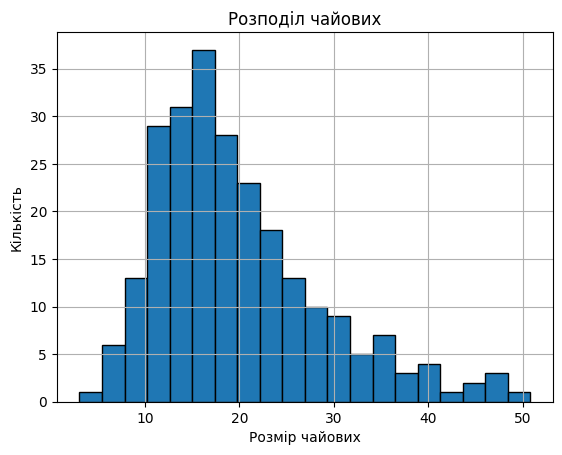

In [2]:
file_name = 'tip.csv'
tip_df = pd.read_csv(file_name)

tip_df['total_bill'].hist(bins=20, edgecolor='black')
plt.title('Розподіл чайових')
plt.xlabel('Розмір чайових')
plt.ylabel('Кількість')


**2. Box plot чайових за днями тижня**

Створіть box plot, який показує розподіл чайових (`tip`) за днями тижня (`day`).
В який день навище медіанне (середнє) значення продажів? Зелена горизонтальна лінія всередині кожного box-plot.


'Неділя має найвищу медіану'

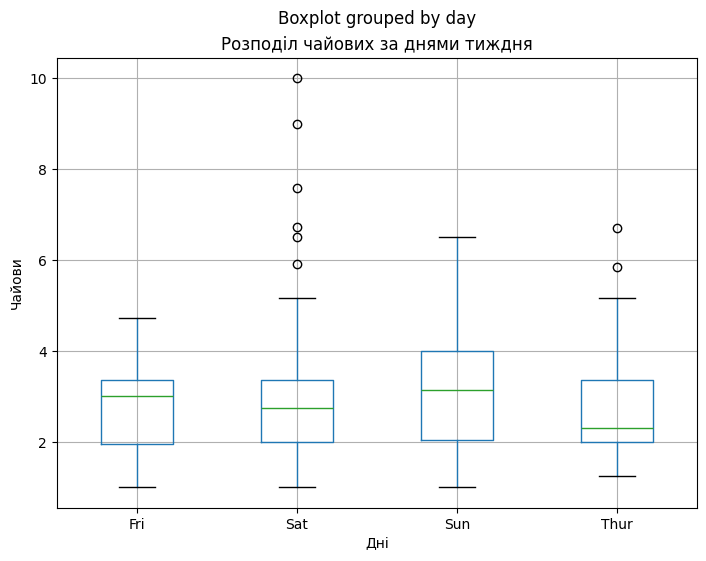

In [3]:
tip_df.boxplot(column='tip', by='day', figsize=(8,6))
plt.title('Розподіл чайових за днями тиждня')
plt.xlabel('Дні')
plt.ylabel('Чайови')
'''Неділя має найвищу медіану'''

---

**3. Scatter plot: рахунок vs чайові**

Створіть діаграму розсіювання для `total_bill` та `tip`.

Text(0, 0.5, 'Чайови')

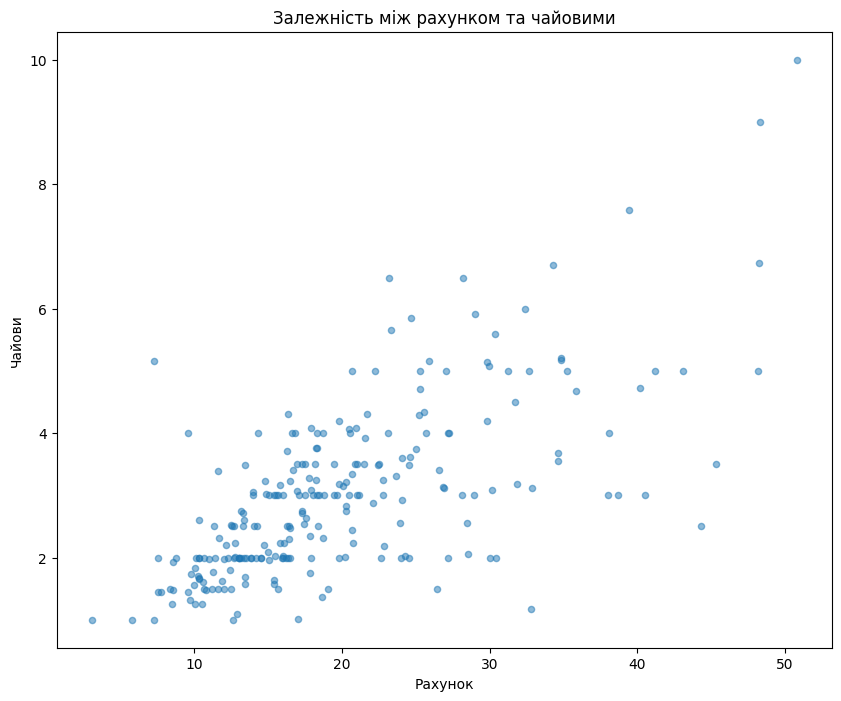

In [4]:
from matplotlib.colors import Colormap
tip_df.plot.scatter(x='total_bill', y='tip', alpha=0.5, figsize=(10, 8))
plt.title('Залежність між рахунком та чайовими')
plt.xlabel('Рахунок')
plt.ylabel('Чайови')

---

**4. Bar chart: середній рахунок за часом**

Створіть стовпчасту діаграму середнього рахунку за часом дня (`time`).

Text(0.5, 0, 'Час')

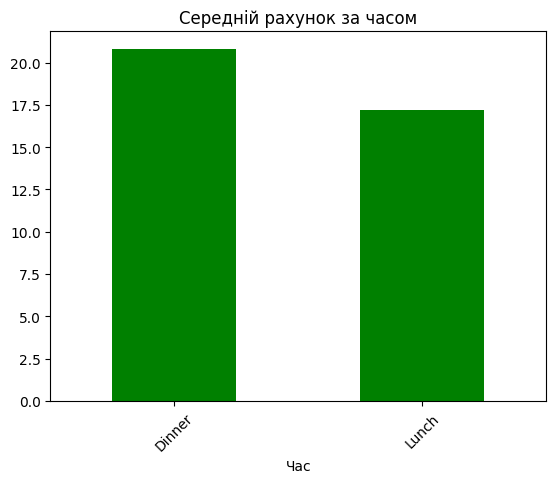

In [5]:
tip_df.groupby('time')['total_bill'].mean().plot(kind='bar', color='green', rot=45)
plt.title('Середній рахунок за часом')
plt.xlabel('Час')

---

**5. Інтерактивна діаграма розсіювання**

Створіть з допомогою бібліотек Plotly інтерактивний scatter plot для `total_bill` vs `tip` з кольором за статтю (`sex`).


In [6]:
sex_names = {'Female':'Жінка', 'Male': 'Чоловік'}

fig = px.scatter(tip_df, x='total_bill', y='tip', color='sex',
                 hover_data='time',
                 title='Залежність між рахунком та чайовими',
                 labels={'total_bill':'Загальний рахунок', 'tip':'Чайови',
                         'sex':'Стать', 'time':'Час дня'}
                 )
fig.for_each_trace(lambda x: x.update(name = sex_names[x.name]))

fig.show()

---

**6. Інтерактивний box plot: чайові за днями та статтю**

Створіть інтерактивний box plot для чайових за днями тижня з розбивкою за кольором по статі.

In [7]:
fig = px.box(tip_df, x='day', y='tip', color='sex',
             hover_data='time',
             title='Залежність між рахунком та чайовими',
             labels={'day':'День', 'tip':'Чайови',
                     'sex':'Стать', 'time':'Час дня'}
             )
fig.for_each_trace(lambda x: x.update(name = sex_names[x.name]))

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)


fig.show()